# Using field lines to interpret divertor-region filament motion in Alcator C-Mod

A high-speed Phantom camera looking at the divertor region of Alcator C-Mod sees filaments of plasma moving perpendicular to the magnetic field. These filaments appear to have the same shape as magnetic field lines, which we can obtain from equilibrium reconstructions. We can then match filaments to similarly shaped field lines, so that we can estimate the filaments' positions in R, Z plane of the torus. Then, we can use blob-tracking algorithms to understand the filaments' motion in the R, Z plane.

>Importance, other findings

## The Phantom camera observes the divertor area from just under the midplane

>take image from talk

## The background is subtracted from Phantom camera images

Populating the interactive namespace from numpy and matplotlib


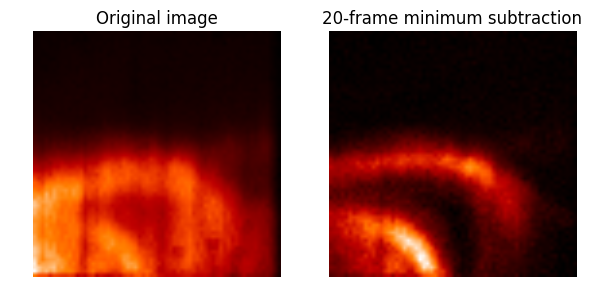

In [6]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
from phantom_viewer import acquire

frames_original = acquire.video(1150611004, 'phantom2', sub=0)
frames = acquire.video(1150611004, 'phantom2', sub=20)

example_i=61
colormap = plt.cm.gist_heat
plt.figure(figsize=(7,10))
plt.subplot(121)
plt.title('Original image')
plt.imshow(frames_original[example_i], origin='bottom', cmap=colormap)
plt.axis('off')
plt.subplot(122)
plt.title('20-frame minimum subtraction')
plt.imshow(frames[example_i], origin='bottom', cmap=colormap)
plt.axis('off')
plt.show()

And we can see filaments more clearly, because they are peaks above the minimum (background). In movies, the filaments appear to move radially inward and outward.



## Synthetic images of field lines in the divertor area are generated using EFIT

Field lines are obtained from EFIT reconstructions of magnetic equilibrium. The field lines look a lot like toroidally symmetric rings in the area where the Phantom camera can see them. When the field lines are projected onto the camera's view, they typically look like arcs. Since we know where the field lines puncture the R, Z plane, we can match their shapes with those of filaments to tell where the filaments are in R, Z space.

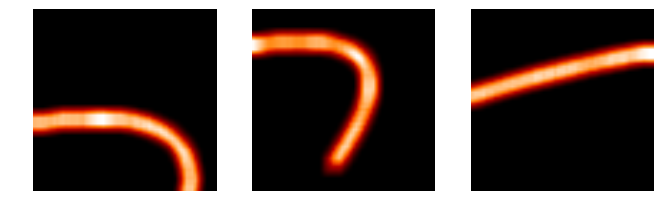

In [2]:
from scipy.io.idl import readsav
fl_data = readsav('../data/Xpt_fieldlines_1150611004_780ms_sp2.sav')
fl_images = fl_data.fl_image

plt.figure()
plt.subplot(131)
plt.imshow(fl_images[545], origin='bottom', cmap=colormap)
plt.axis('off')
plt.subplot(132)
plt.imshow(fl_images[890], origin='bottom', cmap=colormap)
plt.axis('off')
plt.subplot(133)
plt.imshow(fl_images[700], origin='bottom', cmap=colormap)
plt.axis('off')
plt.show()

>also show positions in RZ plane

## Original images are reconstructed by selecting the most highly correlated field line images

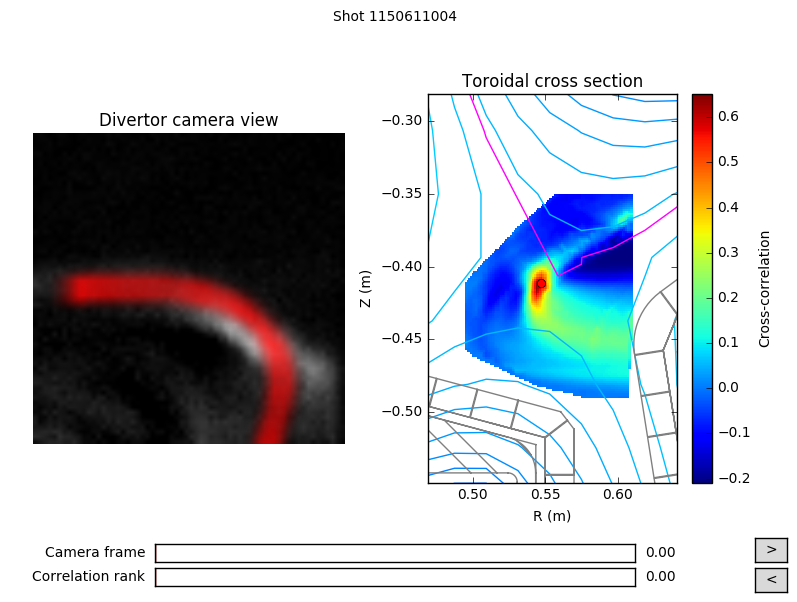

In [7]:
from phantom_viewer import fl_corr
reload(fl_corr)
fl_corr.slide_reconstruct_corr(1150611004, fl_data)

>actually reconstruct images, use normalized cross-correlation, explain above image

## Reconstruction can also be done with non-negative least squares (NNLS) selection of field line images

Negative emissivities don't make much sense and result in solutions that look overfitted. The system of equations being solved is

$$\begin{pmatrix}\mathbf A \\ \lambda \mathbf I\end{pmatrix}\mathbf x = \begin{pmatrix}\mathbf y\\ \mathbf 0\end{pmatrix},$$

where $\mathbf A$ is a matrix with unraveled field line images as columns, $\mathbf y$ is the unraveled original image, and $\lambda$ is a smoothing parameter. NNLS solves for $\mathbf x$, the relative emissivity of each field line image that results in the closest fit to the original, with the constraint that all emissivities must be greater than or equal to 0.

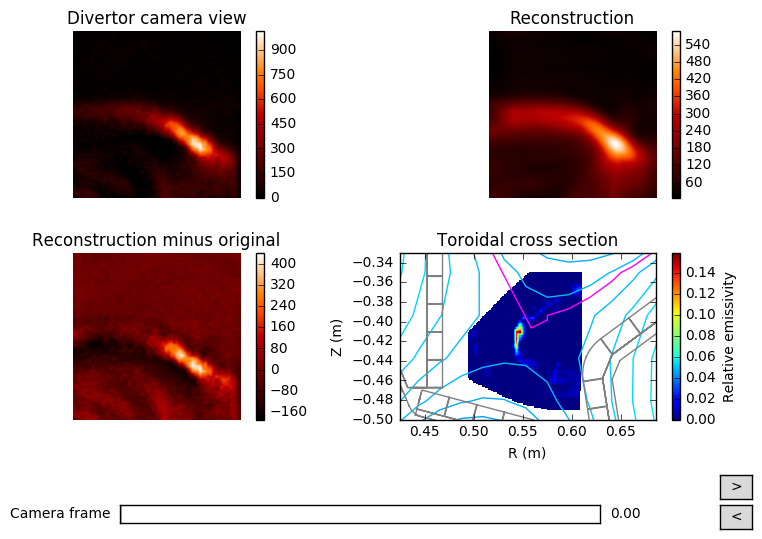

In [4]:
reload(fl_corr)
fl_corr.slide_reconstruct(1150611004, fl_data)

This is nice because the relative emissivity has sharper peaks than the cross-correlation, which will make tracking filaments easier.

## We can use blob-tracking algorithms to follow filament motion

## And when we analyze a bunch of shots, we conclude that...